In [169]:
import os
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt

# Пути к архивам (предполагаем, что файлы имеют расширение .gz)
train_images_path = './datasets/MNIST/raw/train-images-idx3-ubyte.gz'
train_labels_path = './datasets/MNIST/raw/train-labels-idx1-ubyte.gz'
test_images_path = './datasets/MNIST/raw/t10k-images-idx3-ubyte.gz'
test_labels_path = './datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz'

# Функция для распаковки .gz файлов
def extract_gz(gz_path, out_path):
    with gzip.open(gz_path, 'rb') as f_in:
        with open(out_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Распаковываем файлы
extract_gz(train_images_path, 'train-images-idx3-ubyte')
extract_gz(train_labels_path, 'train-labels-idx1-ubyte')
extract_gz(test_images_path, 't10k-images-idx3-ubyte')
extract_gz(test_labels_path, 't10k-labels-idx1-ubyte')

# Функция для чтения и обработки данных MNIST
def load_mnist_images(file_path):
    with open(file_path, 'rb') as file:
        file.read(16)  # Пропускаем заголовок
        data = np.frombuffer(file.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28, 1)

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as file:
        file.read(8)  # Пропускаем заголовок
        return np.frombuffer(file.read(), dtype=np.uint8)

# Загрузка данных
train_images = load_mnist_images('train-images-idx3-ubyte')
train_labels = load_mnist_labels('train-labels-idx1-ubyte')
test_images = load_mnist_images('t10k-images-idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte')

# Нормализуем данные
train_images, test_images = train_images / 255.0, test_images / 255.0


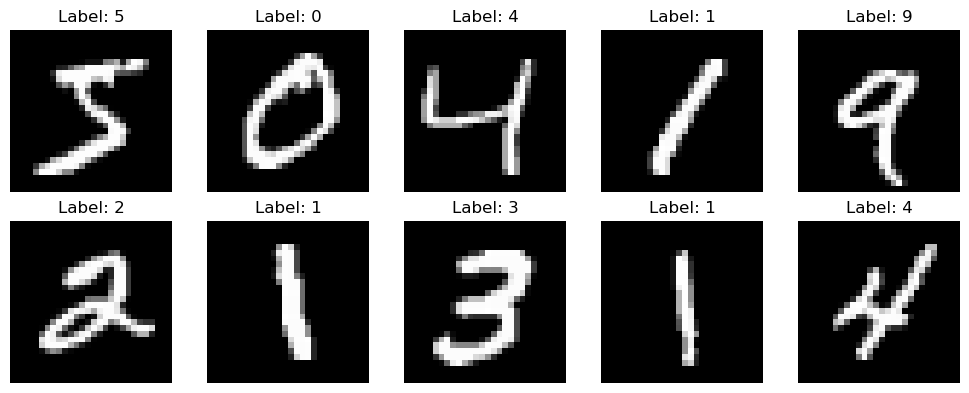

In [170]:
def show_images_grid(images, labels, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 4))
    axes = axes.ravel()  # Преобразуем матрицу осей в плоский массив

    for i in range(rows * cols):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Отображаем 10 изображений в сетке 2x5
show_images_grid(train_images, train_labels, rows=2, cols=5)


In [171]:
from keras import models, layers
# Создаем модель
model = models.Sequential()

# Первый сверточный слой с 32 фильтрами (размер 3x3), с активацией ReLU и размером входа 28x28x1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Второй сверточный слой с 64 фильтрами
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Третий сверточный слой с 64 фильтрами
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Полносвязный слой
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 выходных нейронов для 10 классов


In [172]:
# Компилируем модель
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8933 - loss: 0.3365 - val_accuracy: 0.9855 - val_loss: 0.0457
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9868 - val_loss: 0.0434
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0347 - val_accuracy: 0.9879 - val_loss: 0.0385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9920 - val_loss: 0.0284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.0123 - val_accuracy: 0.9913 - val_loss: 0.0329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9965 - loss: 0.0110 - 

313/313 - 0s - 1ms/step - accuracy: 0.9901 - loss: 0.0357

Точность на тестовых данных: 0.9901000261306763


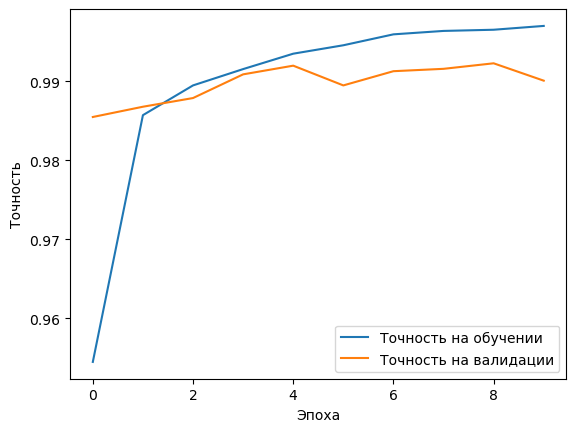

In [173]:
# Оцениваем модель на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочность на тестовых данных: {test_acc}')

# Графики обучения
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


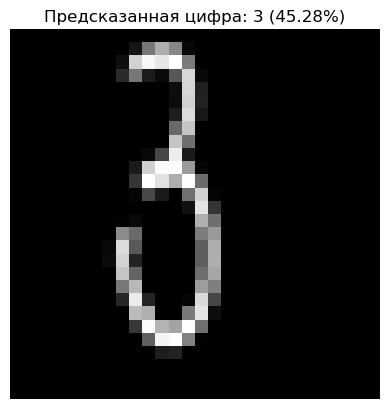

In [184]:

from PIL import Image, ImageOps, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image(filepath):
    img = Image.open(filepath).convert('L')  # Конвертируем в оттенки серого (L mode)
    
    # Применяем фильтр для удаления шума
    img = img.filter(ImageFilter.MedianFilter(size=3))
    
    # Инвертируем изображение, если фон не черный, а цифра не белая
    img = ImageOps.invert(img)
    
    # Применяем адаптивную бинаризацию (если требуется)
    threshold = 128  # Пороговое значение можно подобрать под конкретные изображения
    img = img.point(lambda p: p > threshold and 255)
    
    img = img.resize((28, 28))  # Изменяем размер на 28x28 пикселей
    
    # Нормализуем изображение
    img = np.array(img) / 255.0
    
    img = np.expand_dims(img, axis=-1)  # Добавляем размерность для канала (28, 28, 1)
    img = np.expand_dims(img, axis=0)  # Добавляем размерность для батча (1, 28, 28, 1)
    
    return img

# Функция для предсказания и отображения результата
def predict_and_show_custom(model, image):
    # Предсказание
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)[0]
    predicted_probability = np.max(predictions, axis=1)[0]  # Извлечение вероятности для предсказанного класса
    
    # Отображение результата
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Предсказанная цифра: {predicted_label} ({predicted_probability * 100:.2f}%)')
    plt.axis('off')
    plt.show()

# Пример использования: загрузка изображения и предсказание
image_path = '3.png'  # Укажите путь к вашему изображению
custom_image = load_and_preprocess_image(image_path)
predict_and_show_custom(model, custom_image)
